回溯直线搜索
===

# 1.意义
回溯直线搜索是求解无约束凸优化问题中，调整搜索步长非常简单有效的方法，也是实际应用中常用的方法
- 固定步长搜索，为防止迭代震荡，一般步长值很小，很多经验值取0.01，这就导致收敛速度过慢
- 精确直线搜索，其本身又是一个优化问题，如果这个优化问题很复杂，则这个搜索方法就是没有意义的

# 2.算法介绍
输入：当前点$x$，搜索方向$\Delta{x}$，参数$\alpha \in (0.0.5), \beta \in (0,1)$<br/>
输出：步长t
- 令$t=1$
- 如果$f(x+t\Delta{x}) > f(x) + \alpha{t}\nabla{f(x)}^T\Delta{x}$，令$t=\beta{t}$
- 重复上一步，直到$f(x+t\Delta{x}) \leq f(x) + \alpha{t}\nabla{f(x)}^T\Delta{x}$

# 3.算法解释
回溯线性搜索要求目标函数减少量$f(x)-f(x+t\Delta{x})$小于等于$-\alpha{t}\nabla{f(x)}^T\Delta{x}$即可，一方面防止步长过大发生震荡，另一方面也可以防止步长过小收敛缓慢。由于$\Delta{x}$是下降方向，$\nabla{f(x)}^T\Delta{x} \leq 0$,所以只要t足够小，就一定有
$$f(x+t\Delta{x}) \approx f(x)+t\nabla{f(x)}^T\Delta{x} < f(x)+\alpha{t}\nabla{f(x)}^T\Delta{x}$$
这个公式需要结合泰勒展开来理解

# 4.参数解释
- $\alpha$:参数$\alpha$的正常取值在0.01和0.3之间，表示我们可以接受的$f(x)$的减少量占一阶泰勒展开差值的1%到30%
- $\beta$:参数$\beta$的正常取值在0.1和0.8之间，分别对应非常粗超的搜索和不太粗糙的搜索

对于精确搜索算法和回溯直线搜索算法的比较，可以参考下面代码

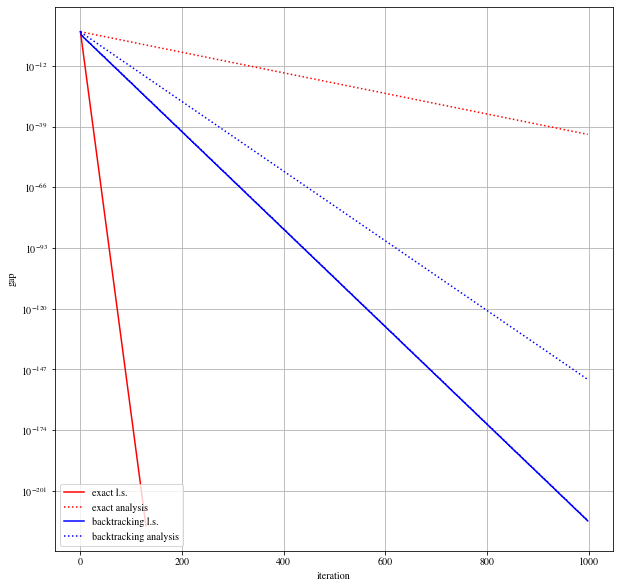

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

iter = 1000
#精准直线搜索确定步长
obj = [None]*iter
x_0 = [10,20]
for i in range(1,iter):
    obj[i-1] = 0.5*x_0[0]**2+5*x_0[1]**2
    x_1 =[None]*2

    x_1 = [(900*x_0[1]**2*x_0[0])/(x_0[0]**2+1000*x_0[1]**2),
           (-9*x_0[0]**2*x_0[1])/(x_0[0]**2+1000*x_0[1]**2)]
    x_0 = x_1
    if x_0 ==[0,0]:
        break
    #回溯直线搜索确定步长
y_0 = [10,20]
obj1 = [None]*iter
a = 0.2
b = 0.6
z = [None]*iter
g = [None]*iter
for i in range(1,iter):
    obj1[i-1] = 0.5*y_0[0]**2+5*y_0[1]**2
    y_1 = [None]*2
    t = 1
    while ((y_0[0]**2*(t**2-2*t)+5*y_0[1]**2*(100*t**2-20*t)+
            a*t*(y_0[0]**2+100*y_0[1]**2)>0)):
        t = b*t
    y_1 = [(y_0[0]-t*y_0[0]),y_0[1]-10*t*y_0[1]]
    y_0 = y_1


    z[i-1] = 2050*(9/10)**i #精准直线搜序收敛性分析
    g[i-1] = 2050*(1-0.3)**i #回溯直线搜索收敛性分析

x = range(0,iter)
plt.figure(figsize=(10,10), facecolor='w')
plt.xlabel('iteration')
plt.ylabel('gap')
plt.semilogy(x,obj,'-r',label='exact l.s.')
plt.semilogy(x,z,':r',label='exact analysis')
plt.semilogy(x,obj1,'-b',label='backtracking l.s.')
plt.semilogy(x,g,':b',label='backtracking analysis')
plt.legend(loc='lower left')
plt.grid()

